# Lab 5: Hypothesis Testing

Welcome to Lab 5! In this lab we will learn about Hypothesis Testing and go through a couple of examples. More information about Hypothesis Testing can be found in the [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html). This lab is due on **Tuesday, 5/11 at 11:59pm.**

In [1]:
import numpy as np
import babypandas as bpd
import math

# These lines set up graphing capabilities.
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import otter
grader = otter.Notebook()

## 1: Hypothesis Techniques and Examining the Therapeutic Touch

In this section, we'll use hypothesis testing techniques that were introduced in lecture to test the idea of the therapeutic touch, the idea that some practictioners can feel and massage your human energy field. 

### What is Therapeutic Touch?

Therapeutic Touch (TT) is an energy therapy that practitioners claim can promote health and relaxation. Practitioners place their hands near a patient and say they are able to detect and manipulate the patient's so-called Human Energy Field (HEF). 
TT was popular throughout the 20th century and was toted as a great way to bring balance to a person's health. 

### Emily Rosa

Emily Rosa was a 4th grade student who had wide exposure to the world of TT due to her parents, who were both medical practitioners and skeptics of the idea of TT. 

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and let them examine her hands to determine which had the stronger energy field. Then she had extend their hands through a screen so they could not see her. On the other side of the screen, Emily would flip a coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to correctly answer which hand Emily put out. Overall, in 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practicioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 1**: What are the null and alternative hypotheses for Emily's experiment? 

**Your Answer Here:**

Null Hypothesis: 

Alternative Hypothesis: 

***Null hypothesis would indicate that Emily's experiment is true and that 44% is wholly due to random chance.***

***Alternative hypothesis would indicate that Emily'e experiment is false and that there is some other reason.***

**Question 2:** Remember that the practitioner got the correct answer 44% of the time. According to the null hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [2]:
expected_correct = .5
expected_correct

0.5

In [3]:
grader.check("q12")

q12 passed!

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 3:** Which of the following is the best statistic for testing this model? Assign `best_ts` to 1, 2, or 3.

1. The difference of the expected percent correct and the actual percent correct
2. The absolute difference of the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct

In [4]:
best_ts = 2
best_ts

2

In [5]:
grader.check("q13")

q13 passed!

**Question 4:** Define the function `test_statistic` which takes in an expected proportion and an actual proportion, and returns the value of the test statistic chosen above. Assume that you are taking in proportions between 0 and 1, but you want to return your answer as a percentage between 0 and 100. 

*Hint:* Remember we are asking for a **percentage** between 0 and 100, not a proportion between 0 and 1. 

In [6]:
def test_statistic(expected_prop, actual_prop):
    expected_perc = expected_prop * 100
    actual_perc = actual_prop * 100 
    return abs(expected_perc - actual_perc)

In [7]:
grader.check("q14")

q14 passed!

**Question 5:** Use your newly defined function to calculate the observed test statistic from Emily's experiment. 

In [8]:
observed_test_statistic = test_statistic(expected_correct, 0.44)
observed_test_statistic

6.0

In [9]:
grader.check("q15")

q15 passed!

**Is this test statistic likely if the null hypothesis was true? Or is the deviation from the expected proportion due to something other than chance?**

In order to answer this question, we must simulate the experiment as though the null hypothesis was true, and calculate the test statistic per each simulation.

**Question 6:** To begin simulating, we should start by creating an array which has two items in it. The first item should be the proportion of times, assuming the null model is true, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practicioner picks the incorrect hand. Assign `model_proportions` to this array. After this, simulate, using the `np.random.multinomial` function, Emily running through this experiment 210 times (as done in real life), and assign the proportion of correct answers to `simulation_proportion`. Lastly, define `one_test_statistic` to the test statistic of this one simulation. 

*Hint:* `np.random.multinomial` usage can be found here: [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)

In [10]:
possible_choices = [.44,.56]
model_proportions = [.5,.5]
simulation_proportion = np.random.multinomial(210, possible_choices)
simulation_proportion = simulation_proportion[0] / 210
one_test_statistic = test_statistic(.5, simulation_proportion)
one_test_statistic

10.0

In [11]:
grader.check("q16")

q16 passed!

**Question 7:** Let's now see what the distribution of test statistics is actually like under our fully specified model. Assign `simulated_test_statistics` to an array of 1000 test statistics that you simulated assuming the null hypothesis is true. 

*Hint:* This should follow the same pattern as normal simulations, in combination with the code you did in the previous problem.  

In [12]:
num_repetitions = 1000
num_guesses = 1000 * 210
simulated_test_statistics = np.array([])

for i in np.arange(num_repetitions):
    simulation_proportion = np.random.multinomial(210, possible_choices)
    simulation_proportion = simulation_proportion[0] / 210
    one_test_statistic = test_statistic(.5, simulation_proportion)
    simulated_test_statistics = np.append(simulated_test_statistics, one_test_statistic)
    
simulated_test_statistics    

array([ 9.04761905,  8.0952381 ,  9.52380952,  9.52380952,  8.57142857,
        0.95238095,  7.14285714, 11.9047619 ,  9.52380952, 10.95238095,
        1.42857143, 13.33333333,  1.42857143,  1.42857143,  5.23809524,
       11.42857143,  5.71428571,  2.85714286,  1.42857143,  0.47619048,
        7.61904762,  4.28571429,  4.28571429,  7.61904762, 10.95238095,
        8.57142857,  2.38095238,  6.19047619,  6.19047619,  5.23809524,
        8.57142857,  6.66666667,  2.38095238,  6.19047619,  7.61904762,
        7.61904762,  4.28571429,  1.9047619 ,  4.28571429,  1.9047619 ,
       11.9047619 ,  7.14285714,  3.33333333,  0.47619048,  8.57142857,
        4.76190476,  9.52380952,  0.95238095,  5.71428571, 11.42857143,
       10.47619048,  6.19047619,  4.76190476, 10.        , 10.        ,
        4.76190476,  3.33333333, 13.80952381,  4.76190476,  4.28571429,
       10.        ,  5.23809524,  6.19047619, 13.33333333, 13.80952381,
        3.80952381,  7.61904762,  7.14285714,  3.33333333, 10.47

In [13]:
grader.check("q17")

q17 passed!

Let's view the distribution of the simulated test statistics under the null, and visually compare how the observed test statistic lies against the rest. 

<AxesSubplot:ylabel='Frequency'>

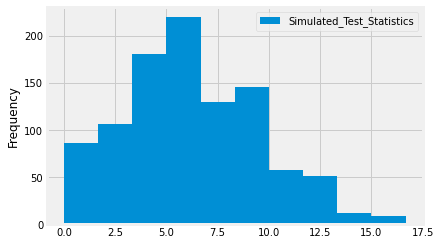

In [14]:
t = bpd.DataFrame().assign(Simulated_Test_Statistics = simulated_test_statistics)
t.plot(kind='hist')

We can make a visual argument as to whether or not we believe the observed test statistic is likely to occur under the null, or we can use the definition of p-values to help us make a more formal argument. 

**Question 8:** Assume `p_value` to the integer corresponding to the correct definition of what a p-value really is. 

1. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed
2. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative
3. The chance, under the alternative hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the null 
4. The number of times, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative

In [15]:
p_value = 2
p_value

2

In [16]:
grader.check("q18")

q18 passed!

**Question 9:** Using the definition above, calculate the p-value of Emily's observed value in this experiment. 

*Hint:* If our test statistic is further in the direction of the alternative, will larger value or a smaller value? 

*Hint:* The [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html) contains an example of calculating an empirical p-value.

In [17]:
emily_p_val = np.count_nonzero(simulated_test_statistics >= observed_test_statistic) / 1000
emily_p_val

0.527

In [18]:
grader.check("q19")

q19 passed!

If our p-value is less than or equal to .05, then this is in favor of our alternative and we reject the null hypothesis. Otherwise, we do not have enough evidence against our null hypothesis. Note that this does **not** say we side in favor with the null hypothesis and accept it, but rather, that we just fail to reject it. 

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

## 2. No Class Participation??

An iClicker manufacturing company claims that it produces iClickers that are 98% non-faulty. In other words, only 2% of the iClickers that they manufacture have some fault in them. They open a retail shop near UCSD right before the new school year. Since this new store sells iClickers at a somewhat reasonable price for college students, 100 UCSD freshmen have bought iClickers at this shop. However, it is soon discovered that six of the students have faulty iClickers and are complaining about lack of attendance credit. You're angry and argue that the company's claim is wrong. But the company is adament that they are right. You decide to investigate.

**Question 1.** Assign `null_probabilities` to a two-item *array* such that the first element contains the chance of an iClicker being functioning and the second element contains the chance that the phone is faulty under the **null hypothesis**.

In [19]:
null_probabilities = [.98,.02]
null_probabilities

[0.98, 0.02]

In [20]:
grader.check("q21")

q21 passed!

**Question 2.** Using the function you wrote above, simulate the buying of 100 iClickers 5,000 times, using the proportions that you assigned to `null_probabilities`. Create an *array* `simulations` with the number of faulty iClickers in each simulation.

Hint: `np.random.multinomial` usage can be found here: [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html)

In [21]:
simulations = np.array([])
repetitions = 5000

for i in np.arange(repetitions):
    simulation_results = np.random.multinomial(100, null_probabilities)
    simulations = np.append(simulations, simulation_results[1])


In [22]:
grader.check("q22")

q22 passed!

(array([ 674., 1385., 1320.,  943.,  431.,  172.,   74.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 7 artists>)

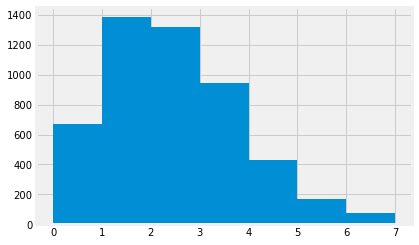

In [23]:
#: Consider the resulting histogram of the fault_statistics array
plt.hist(simulations, bins=np.arange(8))

**Question 3.** Using the results of your simulation, calculate an estimate of the p-value, i.e., the probability of observing six or more faulty iClickers under the null hypothesis. Assign your answer to `p_value_2_3`

In [24]:
p_value_2_3 = np.count_nonzero(simulations >= 6) / 5000
p_value_2_3

0.015

In [25]:
grader.check("q23")

q23 passed!

**Question 4.** State precisely the null hypothesis and the alternative hypothesis for this experiment.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

The null hypothesis would indicate this experiment to be true and that 6 faulty iClickers were random.

The alternative hypothesis would indicate this experiment to be false and there is some other reason.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 5.** Now that you have the results of your simulation, which hypothesis do you think is true? Set your answer to `hypothesis` in the cell below.

- 1) Null Hypothesis
- 2) Alternative Hypothesis
- 3) Neither

In [26]:
hypothesis = 2
hypothesis

2

In [27]:
grader.check("q25")

q25 passed!

## Before submitting, select "Kernel" -> "Restart & Run All" from the menu!

Then make sure that all of your cells ran without error.

Congratulations! You are done with lab05

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [28]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q12 passed!

q13 passed!

q14 passed!

q15 passed!

q16 passed!

q17 passed!

q18 passed!

q19 passed!

q21 passed!

q22 passed!

q23 passed!

q25 passed!